In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
from pyfonts import load_font, set_default_font

In [2]:
mta_art = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-22/mta_art.csv')
station_lines = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-22/station_lines.csv')

In [3]:
mta_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agency           381 non-null    object
 1   station_name     381 non-null    object
 2   line             378 non-null    object
 3   artist           381 non-null    object
 4   art_title        381 non-null    object
 5   art_date         381 non-null    int64 
 6   art_material     381 non-null    object
 7   art_description  378 non-null    object
 8   art_image_link   376 non-null    object
dtypes: int64(1), object(8)
memory usage: 26.9+ KB


In [4]:
mta_art.head(2)

,agency,station_name,line,artist,art_title,art_date,art_material,art_description,art_image_link
0,NYCT,Clark St,"2,3",Ray Ring,Clark Street Passage,1987,Terrazzo floor tile,The first model that Brooklyn-born artist Ray ...,https://new.mta.info/agency/arts-design/collec...
1,NYCT,125 St,"4,5,6",Houston Conwill,The Open Secret,1986,Bronze - polychromed,"The Open Secret, in the 125th Street and Lexin...",https://new.mta.info/agency/arts-design/collec...


In [5]:
mta_art["art_material"] = mta_art["art_material"].str.lower().str.replace("-", "").str.replace(",", "").str.replace(";", "").str.replace("/", "")

In [6]:
# Function to remove action verbs
def remove_action_verbs(text):
    return ' '.join(re.findall(r'\b(?!\w*ed\b)\w+\b', text))

mta_art["materials"] = mta_art["art_material"].apply(remove_action_verbs)

In [7]:
mta_art

,agency,station_name,line,artist,art_title,art_date,art_material,art_description,art_image_link,materials
0,NYCT,Clark St,"2,3",Ray Ring,Clark Street Passage,1987,terrazzo floor tile,The first model that Brooklyn-born artist Ray ...,https://new.mta.info/agency/arts-design/collec...,terrazzo floor tile
1,NYCT,125 St,"4,5,6",Houston Conwill,The Open Secret,1986,bronze polychromed,"The Open Secret, in the 125th Street and Lexin...",https://new.mta.info/agency/arts-design/collec...,bronze
2,NYCT,Astor Pl,6,Milton Glaser,Untitled,1986,porcelain enamel murals,"Milton Glaser, best known for his work in grap...",https://new.mta.info/agency/arts-design/collec...,porcelain enamel murals
3,NYCT,Kings Hwy,"B,Q",Rhoda Andors,Kings Highway Hieroglyphs,1987,porcelain enamel murals on steel,The artist discusses her work: ÒIf public art...,https://new.mta.info/agency/arts-design/collec...,porcelain enamel murals on steel
4,NYCT,Newkirk Av,"B,Q",David Wilson,Transit Skylight,1988,zincglazed apolycarbonate skylight,"The artist recalls, ÒAbout the same time that ...",https://new.mta.info/agency/arts-design/collec...,apolycarbonate skylight
...,...,...,...,...,...,...,...,...,...,...
376,NYCT,Alabama Av,"J,Z",Scott Redden,Untitled,2007,faceted glass,Images of rural America evoke a nostalgia past...,https://new.mta.info/agency/arts-design/collec...,glass
377,NYCT,Woodside-61 St,7,John Cavanagh,Commuting/Community,1986,porcelain enamel photomontage murals on steel,Commuting/Community reflects John Cavanagh's i...,https://new.mta.info/agency/arts-design/collec...,porcelain enamel photomontage murals on steel
378,NYCT,Fulton St,"A, C, J, Z, 2, 3, 4, 5",Nancy Holt,Astral Grating,1987,wrought iron light elements,Nancy Holt's steel ceiling sculpture incorpora...,https://new.mta.info/agency/arts-design/collec...,wrought iron light elements
379,NYCT,5 Av/53 St,"E,M",Ralph Fasanella,Subway Riders,1995,painting oil,All of us find ourselves from time to time mus...,https://new.mta.info/agency/arts-design/collec...,painting oil


In [8]:
# Words to remove
words_to_remove = ["cast", "wrought", "and", "corten", "paving", "handmade", "tubes", "mosaictile", "acrylic", "hand", "planting", "art",
                   "custom", "panels", "seating", "software", "curving", "electrical", "hardware"]

mta_art["materials"] = mta_art["materials"].apply(
    lambda x: ' '.join(word for word in x.split() if word not in words_to_remove)
)

# Get primary material
mta_art["materials"] = mta_art["materials"].str.split(" ").str[0]

In [9]:
mta_art["materials"].value_counts()

materials
glass             212
ceramic            36
stainless          26
bronze             19
aluminum           16
steel              13
porcelain          10
mosaic             10
copper              5
iron                5
concrete            4
lighting            3
stone               2
granite             2
metal               2
marble              2
painting            2
sound               2
mosaicglass         2
terracotta          2
apolycarbonate      1
terrazzo            1
brick               1
terra               1
celadon             1
various             1
Name: count, dtype: int64

In [10]:
# Replace specific materials
mta_art["materials"] = mta_art["materials"].replace({"stainless":"steel", "mosaicglass":"mosaic"})

In [11]:
# Material type and color dictionaries
material_type = {
    "steel": "metal", "iron": "metal", "bronze": "metal", "copper": "metal", "aluminum": "metal", "metal": "metal",
    "ceramic": "ceramic", "porcelain": "ceramic", "terracotta": "ceramic", "celadon": "ceramic", "marble": "stone",
    "granite": "stone", "stone": "stone", "concrete": "stone", "glass": "glass", "apolycarbonate": "polymer",
    "brick": "earth", "terra": "earth", "terrazzo": "earth", "painting": "painting", "sound": "tech",
    "lighting": "tech", "mosaic": "mosaic", "various": "mixed"
}

type_colors = {
    "metal": "#485562", 
    "ceramic": "#EF76B4", 
    "stone": "#A89D8D", 
    "glass": "#28AF40", 
    "polymer": "#2456AA", 
    "earth": "#AC522F", 
    "painting": "#D13D3B", 
    "tech": "#15A9FA", 
    "mosaic": "#F1B218", 
    "mixed": "#EE8B17" 
}

mta_art["types"] = mta_art["materials"].map(material_type)

In [12]:
img = Image.open("billboard-with-copy-space-chromatic-color.jpg")

In [13]:
helvetica = load_font(
  font_url="https://github.com/helvetica-font/helvetica-font.github.io/blob/master/fonts/Helvetica.ttf?raw=true"
)

set_default_font(helvetica)

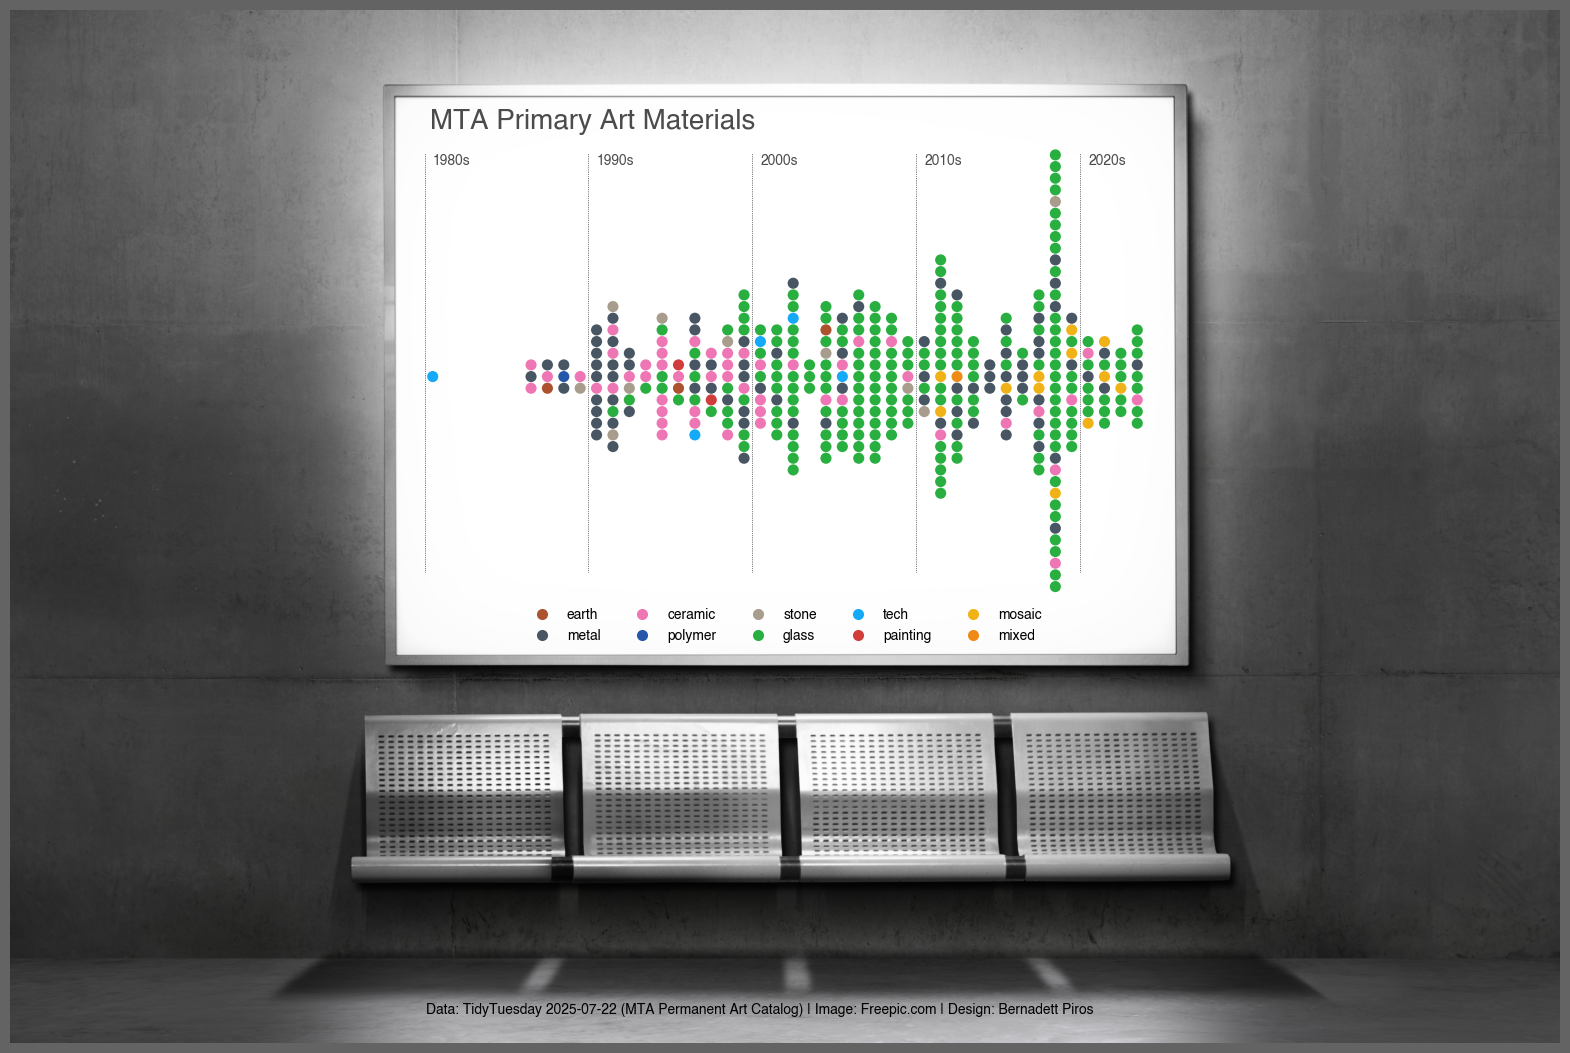

In [17]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.imshow(img) 
ax.axis("off")

child_ax = ax.inset_axes([0.25, 0.375, 0.5, 0.54])
sns.swarmplot(data=mta_art, x="art_date", size=8, hue="types", palette=type_colors, ax=child_ax)
child_ax.axis("off")

child_ax.legend(title=None, ncol=5, loc="lower center", frameon=False)

listx = [1979.5, 1989.5, 1999.5, 2009.5, 2019.5]
list_ymin = [0.15, 0.15, 0.15, 0.15, 0.15]
list_ymax = [0.9, 0.9, 0.9, 0.9, 0.9]

for x, ymin, ymax in zip(listx, list_ymin, list_ymax):
    child_ax.axvline(x=x, ymin=ymin, ymax=ymax, linestyle="dotted", color="black", lw=0.5)

years = ["1980s", "1990s", "2000s", "2010s", "2020s"]

for x, year in zip(listx, years):
    child_ax.text(x=x+0.5, y=-0.38, s=year, color="black", alpha=0.7)


fig.text(0.335, 0.76, "MTA Primary Art Materials", color="black", alpha=0.7, size=20, weight="bold")

fig.text(0.5, 0.17, "Data: TidyTuesday 2025-07-22 (MTA Permanent Art Catalog) | Image: Freepic.com | Design: Bernadett Piros", weight="bold", ha="center")

plt.show()

#fig.savefig("2025-07-22.png", bbox_inches='tight', pad_inches=0.2)